## Install Packages

In [1]:
# Mengunduh seluruh package yang diperlukan
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install nltk
!pip install emoji
!pip install scikit-learn
!pip install torchinfo
!pip install torchview

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.9 MB/s eta 0:00:00


## Import Libraries

In [2]:
# Mengimpor seluruh library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import emoji
import nltk
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import AdamW
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchinfo import summary
from torchview import draw_graph
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoConfig
from transformers import get_scheduler
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords') # Unduh stopwords jika belum tersedia
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay
from tqdm import tqdm
import joblib
import random
import glob
import os
import warnings # Import modul 'warnings' untuk mengatur peringatan
warnings.filterwarnings('ignore') # Nonaktifkan semua peringatan

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Collection

In [3]:
# Mengambil URL file CSV dari Hugging Face
url = 'https://huggingface.co/datasets/reyhanksatria05/PRDECT-ID_Dataset/resolve/main/PRDECT-ID_Dataset.csv'

# Membaca file CSV ke dalam dataframe pandas
df = pd.read_csv(url)

## Exploratory Data Analysis (EDA)

In [4]:
# Menampilkan dataset
print(df)

                   Category  \
0     Computers and Laptops   
1     Computers and Laptops   
2     Computers and Laptops   
3     Computers and Laptops   
4     Computers and Laptops   
...                     ...   
5395              Household   
5396              Household   
5397              Household   
5398              Household   
5399              Household   

                                           Product Name  \
0     Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1     PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2                   SSD Midasforce 128 Gb - Tanpa Caddy   
3     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4     ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
...                                                 ...   
5395  PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...   
5396  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5397  Ultrasonic Aroma Diffuser Humidifier Colorful ...   
5398  Ultrasonic Aroma Diffuser Humid

In [5]:
# Menampilkan 5 baris pertama dari data
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [6]:
# Menampilkan 5 baris terakhir dari data
df.tail()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
5395,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562,5,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,Love
5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,Love
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,"pengemasan barang baik, kondisi barang jg utuh...",Positive,Happy
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,Happy
5399,Household,TDS Meter 3 Alat Ukur Hidroponik Air Aquarium ...,Jakarta Utara,14400,4.9,4765,3044,5,"Produk sesuai deskripsi, packing aman terlindu...",Positive,Love


In [7]:
# Menampilkan ringkasan informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [8]:
# Menampilkan ukuran dataset dalam format baris dan kolom
data_shape = df.shape
print(f"Dataset ini memiliki {data_shape[0]} baris dan {data_shape[1]} kolom.")

Dataset ini memiliki 5400 baris dan 11 kolom.


In [9]:
# Menampilkan daftar kolom
df.columns

Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion'],
      dtype='object')

In [10]:
# Menampilkan semua kolom numerik
numeric_cols = df.select_dtypes(include = ['number']).columns
print("Kolom Numerik:", numeric_cols.tolist())
print("Jumlah Kolom Numerik:", len(numeric_cols))

Kolom Numerik: ['Price', 'Overall Rating', 'Number Sold', 'Total Review', 'Customer Rating']
Jumlah Kolom Numerik: 5


In [11]:
# Menampilkan semua kolom kategorikal
categorical_cols = df.select_dtypes(include = ['object']).columns
print("Kolom Kategorikal:", categorical_cols.tolist())
print("Jumlah Kolom Kategorikal:", len(categorical_cols))

Kolom Kategorikal: ['Category', 'Product Name', 'Location', 'Customer Review', 'Sentiment', 'Emotion']
Jumlah Kolom Kategorikal: 6


In [12]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe().round(2) # Membulatkan hasil ke 2 angka desimal

,Price,Overall Rating,Number Sold,Total Review,Customer Rating
count,5400.00,5400.00,5400.00,5400.00,5400.00
mean,238696.13,4.85,15961.95,2168.65,3.09
std,801633.72,0.11,74201.91,2915.67,1.77
min,100.00,4.10,9.00,4.00,1.00
25%,20000.00,4.80,1630.00,576.00,1.00
50%,59900.00,4.90,3794.50,1192.00,3.00
75%,150000.00,4.90,9707.00,2582.00,5.00
max,15399000.00,5.00,1000000.00,24500.00,5.00


In [13]:
# Memilih hanya kolom dengan tipe data object
obj_cols = df.select_dtypes(include = 'object')

# Menampilkan ringkasan statistik deskriptif untuk kolom bertipe object
obj_cols.describe()

,Category,Product Name,Location,Customer Review,Sentiment,Emotion
count,5400,5400,5400,5400,5400,5400
unique,29,1308,61,5305,2,5
top,Computers and Laptops,Minigold Black Series Logam Mulia Koin Emas Mi...,Jakarta Barat,jelek,Negative,Happy
freq,200,25,1293,4,2821,1770


In [14]:
# Mengecek jumlah missing values
df.isna().sum()

,0
Category,0
Product Name,0
Location,0
Price,0
Overall Rating,0
Number Sold,0
Total Review,0
Customer Rating,0
Customer Review,0
Sentiment,0


Tidak ada missing values dalam dataset ini.

In [15]:
# Menampilkan daftar kategori sentimen unik dalam kolom 'Sentiment'
print("Kategori sentimen unik:", df['Sentiment'].unique().tolist())

# Menampilkan jumlah total kategori sentimen unik
print("Jumlah kategori sentimen:", df['Sentiment'].nunique())

Kategori sentimen unik: ['Positive', 'Negative']
Jumlah kategori sentimen: 2


In [16]:
# Menampilkan jumlah masing-masing kategori sentimen yang ada dalam kolom 'Sentiment'
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,2821
Positive,2579


In [17]:
# Menampilkan proporsi (dalam persen) dari masing-masing kategori sentimen
sentiment_counts = df['Sentiment'].value_counts(normalize = True)
percentages = sentiment_counts * 100
sentiment_percent = percentages.round(1)
print(sentiment_percent)

Sentiment
Negative    52.2
Positive    47.8
Name: proportion, dtype: float64


In [18]:
# Menampilkan daftar kategori emosi unik dalam kolom 'Emotion'
print("Kategori emosi unik:", df['Emotion'].unique().tolist())

# Menampilkan jumlah kategori emosi unik
print("Jumlah kategori emosi:", df['Emotion'].nunique())

Kategori emosi unik: ['Happy', 'Sadness', 'Anger', 'Love', 'Fear']
Jumlah kategori emosi: 5


In [19]:
# Menampilkan jumlah masing-masing kategori emosi yang ada dalam kolom 'Emotion'
df['Emotion'].value_counts()

,count
Emotion,
Happy,1770
Sadness,1202
Fear,920
Love,809
Anger,699


In [20]:
# Menampilkan proporsi (dalam persen) dari masing-masing kategori emosi
emotion_counts = df['Emotion'].value_counts(normalize = True)
percentages = emotion_counts * 100
emotion_percent = percentages.round(1)
print(emotion_percent)

Emotion
Happy      32.8
Sadness    22.3
Fear       17.0
Love       15.0
Anger      12.9
Name: proportion, dtype: float64


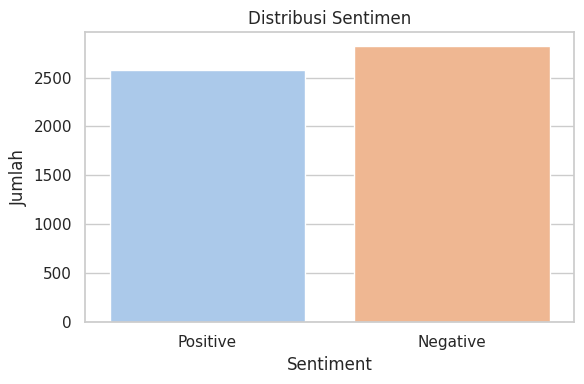

In [21]:
# Mengatur gaya visualisasi
sns.set_theme(style = "whitegrid")

# Membuat ukuran figure
plt.figure(figsize = (6, 4))

# Membuat plot jumlah data berdasarkan kategori sentimen
sns.countplot(x = 'Sentiment', data = df, palette = 'pastel')

# Menambahkan judul dan label sumbu
plt.title("Distribusi Sentimen") # Judul grafik
plt.xlabel("Sentiment") # Label sumbu X
plt.ylabel("Jumlah") # Label sumbu Y

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

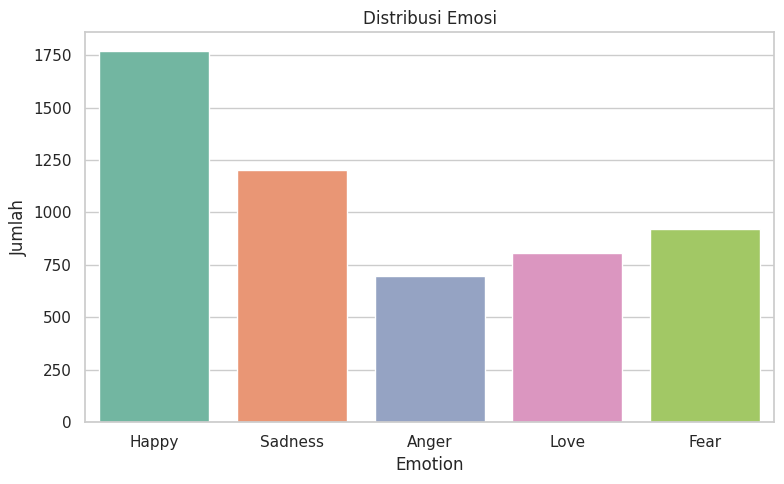

In [22]:
# Mengatur gaya visualisasi
sns.set_theme(style = "whitegrid")

# Membuat ukuran figure
plt.figure(figsize = (8, 5))

# Membuat plot jumlah data berdasarkan kategori emosi
sns.countplot(x = 'Emotion', data = df, palette = 'Set2')

# Menambahkan judul dan label sumbu
plt.title("Distribusi Emosi")
plt.xlabel("Emotion")
plt.ylabel("Jumlah")

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

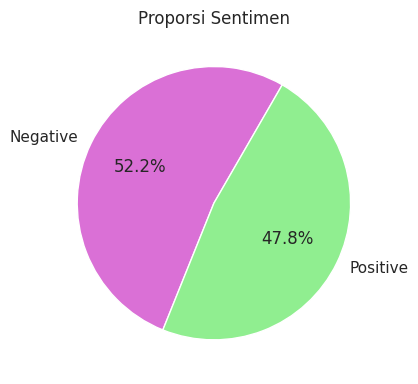

In [23]:
# Menghitung jumlah masing-masing kategori sentimen
sentiment_counts = df['Sentiment'].value_counts()

# Membuat pie chart berdasarkan distribusi sentimen
plt.figure(figsize = (6, 4))
plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct = '%1.1f%%',
        colors = ['orchid', 'lightgreen'], startangle = 60, wedgeprops = {'edgecolor': 'white'})

# Menambahkan judul pada grafik
plt.title('Proporsi Sentimen')

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi di atas menunjukkan distribusi sentimen dari ulasan konsumen terhadap produk skincare dengan sentimen negatif mendominasi dengan 52.2% dari total ulasan. Sementara, sentimen positif berada di angka 47.8%, menunjukkan selisih yang cukup dekat.

## Insight yang didapat:
Meskipun ulasan positif cukup tinggi, tingginya proporsi sentimen negatif mengindikasikan adanya aspek yang kurang memuaskan dari produk atau layanan yang diberikan. Hal ini penting untuk diperhatikan oleh produsen atau penyedia layanan agar dapat melakukan perbaikan.

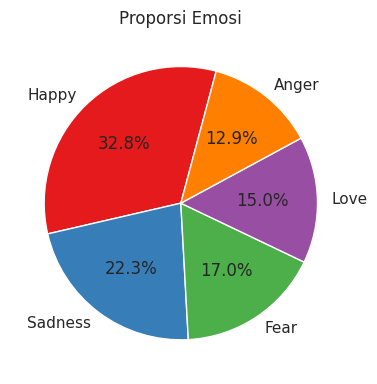

In [24]:
# Menghitung jumlah masing-masing kategori emosi
emotion_counts = df['Emotion'].value_counts()

# Membuat pie chart berdasarkan distribusi emosi
plt.figure(figsize = (6, 4))
plt.pie(emotion_counts, labels = emotion_counts.index, autopct = '%1.1f%%',
        colors = sns.color_palette('Set1'), startangle = 75, wedgeprops = {'edgecolor': 'white'})

# Menambahkan judul pada grafik
plt.title('Proporsi Emosi')

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi di atas menunjukkan distribusi berbagai emosi yang terekspresi dalam ulasan pelanggan, yaitu sebagai berikut:

• "Happy" mendominasi dengan 32.8%, menunjukkan bahwa banyak pelanggan merasa puas atau senang terhadap produk yang mereka gunakan.

• "Sadness" juga cukup tinggi (22.3%), menandakan kekecewaan atau ketidakpuasan dari sebagian pelanggan.

• "Fear" (17.0%) dan "Love" (15.0%) menunjukkan adanya kekhawatiran maupun keterikatan emosional terhadap produk tertentu.

• "Anger" tercatat paling rendah dengan 12.9%, tetapi tetap signifikan dan perlu menjadi perhatian.

## Insight yang didapat:
Kombinasi tingginya emosi positif seperti "Happy" dan "Love" bersama dengan emosi negatif seperti "Sadness", "Fear", dan "Anger" mencerminkan pengalaman pelanggan yang sangat beragam. Ini menjadi masukan penting bagi brand untuk mempertahankan kualitas sekaligus mengurangi penyebab kekecewaan dan ketakutan konsumen.

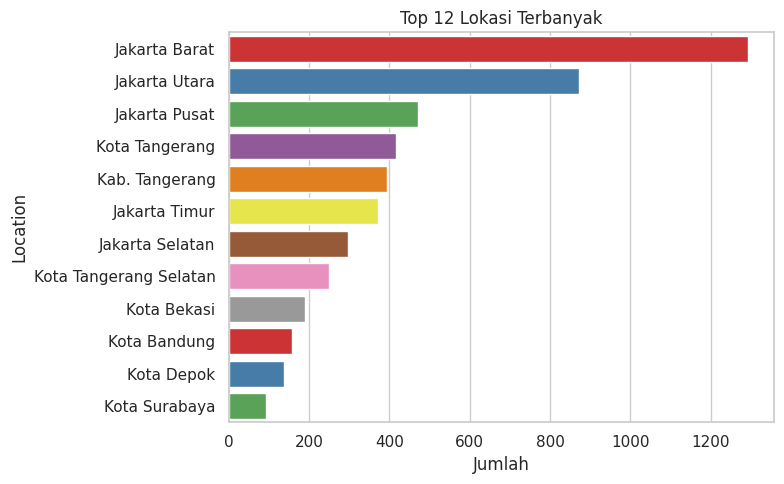

In [25]:
# Membuat visualisasi 12 lokasi dengan frekuensi tertinggi
top_locations = df['Location'].value_counts().head(12).index # Ambil 12 lokasi dengan frekuensi tertinggi

# Buat grafik batang horizontal untuk memperlihatkan distribusi lokasi
plt.figure(figsize = (8, 5))
sns.countplot(data = df, y = 'Location', order = top_locations, palette = 'Set1')

# Menambahkan judul pada grafik
plt.title("Top 12 Lokasi Terbanyak")

# Menambahkan label sumbu
plt.xlabel("Jumlah") # Label sumbu X
plt.ylabel("Location") # Label sumbu Y

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi di atas menunjukkan bahwa:

• Jakarta Barat menjadi lokasi dengan jumlah terbanyak dalam data, menunjukkan dominasi yang cukup signifikan dibandingkan lokasi lainnya.

• Disusul oleh Jakarta Utara dan Jakarta Pusat, terlihat bahwa sebagian besar aktivitas berasal dari wilayah DKI Jakarta itu sendiri.

• Lokasi-lokasi seperti Kota Tangerang, Kab. Tangerang, dan Bekasi juga masuk dalam 12 besar, mengindikasikan bahwa wilayah sekitar Jakarta baik di sisi barat maupun timur menunjukkan tingkat aktivitas yang cukup tinggi.

• Kota-kota besar di luar wilayah DKI Jakarta, seperti Bandung dan Surabaya, muncul dengan jumlah yang relatif lebih kecil.

## Insight yang didapat:
Sebagian besar aktivitas berasal dari wilayah DKI Jakarta, terutama Jakarta Barat. Hal ini menunjukkan konsentrasi pelanggan atau transaksi yang tinggi di pusat-pusat urban. Dominasi kota-kota besar di grafik ini bisa mencerminkan tingginya penetrasi internet, aktivitas belanja online, atau populasi digital yang aktif di wilayah tersebut. Sebaliknya, meskipun Bandung dan Surabaya termasuk kota besar, keterlibatan mereka relatif lebih rendah dalam dataset ini.

In [26]:
# Menampilkan jumlah masing-masing kategori produk yang ada dalam kolom 'Category'
print(df['Category'].value_counts())

# Menampilkan jumlah kategori produk
print("Jumlah kategori produk:", df['Category'].nunique())

Category
Computers and Laptops       200
Toys and Hobbies            200
Food and Drink              200
Office & Stationery         200
Automotive                  200
Animal Care                 200
Body Care                   200
Party Supplies and Craft    200
Carpentry                   200
Other Products              200
Sport                       200
Kitchen                     200
Books                       200
Camera                      200
Gaming                      200
Electronics                 200
Kids and Baby Fashion       200
Men's Fashion               200
Muslim Fashion              200
Women's Fashion             200
Movies and Music            200
Health                      200
Beauty                      200
Phones and Tablets          200
Mother and Baby             200
Household                   200
Precious Metal               80
Tour and Travel              80
Property                     40
Name: count, dtype: int64
Jumlah kategori produk: 29


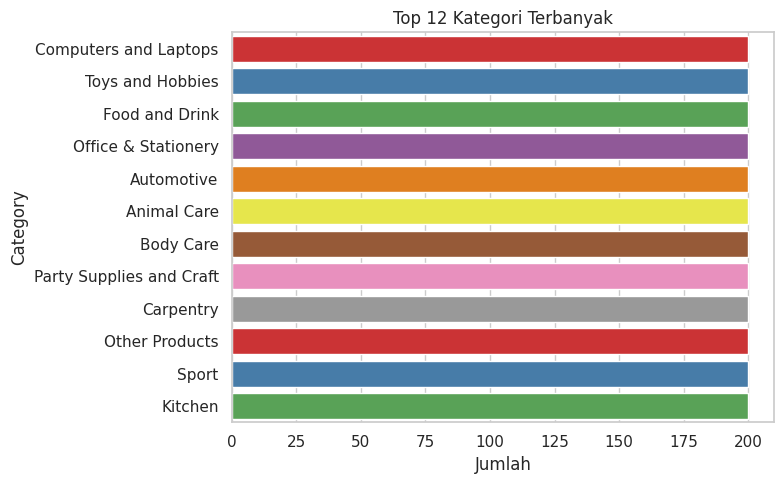

In [27]:
# Membuat visualisasi 12 kategori dengan frekuensi tertinggi
top_categories = df['Category'].value_counts().head(12).index # Ambil 12 kategori dengan frekuensi tertinggi

# Buat grafik batang horizontal untuk memperlihatkan distribusi kategori
plt.figure(figsize = (8, 5))
sns.countplot(data = df, y = 'Category', order = top_categories, palette = 'Set1')

# Menambahkan judul pada grafik
plt.title("Top 12 Kategori Terbanyak")

# Menambahkan label sumbu
plt.xlabel("Jumlah") # Label sumbu X
plt.ylabel("Category") # Label sumbu Y

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi di atas menunjukkan bahwa:

• Setiap kategori memiliki jumlah produk yang sama, yaitu sebanyak 200 item.

• Tidak ada kategori yang mendominasi secara jumlah, sehingga grafik terlihat seimbang secara horizontal.

• Jumlah yang seragam ini mengarahkan fokus pada variasi kategori produk, bukan pada perbedaan kuantitasnya.

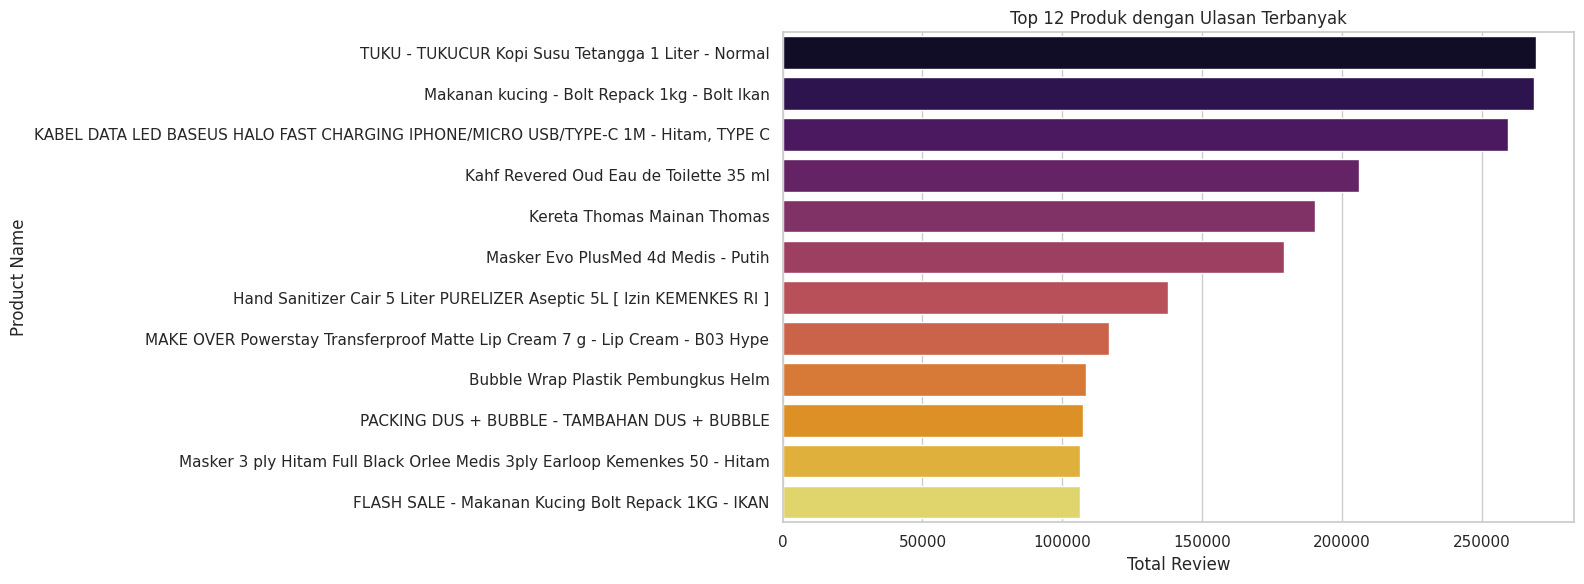

In [28]:
# Mengelompokkan data berdasarkan nama produk, lalu menghitung total ulasan dan mengambil 12 produk teratas
top_products = df.groupby('Product Name')['Total Review'].sum().sort_values(ascending = False).head(12) # Ambil 12 produk dengan ulasan terbanyak

# Membuat diagram batang horizontal untuk produk dengan ulasan terbanyak
plt.figure(figsize = (16, 6))
sns.barplot(x = top_products.values, y = top_products.index, palette = 'inferno')

# Menambahkan judul pada grafik
plt.title("Top 12 Produk dengan Ulasan Terbanyak")

# Menambahkan label sumbu
plt.xlabel("Total Review") # Label sumbu X
plt.ylabel("Product Name") # Label sumbu Y

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi dari grafik di atas menunjukkan bahwa:

• Produk TUKU - TUKUCUR Kopi Susu Tetangga 1 Liter - Normal menjadi yang paling banyak diulas, menandakan popularitas tinggi atau strategi promosi yang kuat.

• Diikuti oleh Makanan kucing - Bolt Repack 1kg - Bolt Ikan dan KABEL DATA LED BASEUS HALO FAST CHARGING IPHONE/MICRO USB/TYPE-C 1M - Hitam, TYPE C, yang menunjukkan bahwa kebutuhan sehari-hari seperti makanan hewan dan aksesori gadget memiliki permintaan tinggi.

• Produk lainnya seperti parfum (Kahf Revered Oud Eau de Toilette 35 ml), mainan anak (Kereta Thomas Mainan Thomas), hingga masker medis (Masker 3 ply Hitam Full Black Orlee Medis 3ply Earloop Kemenkes 50 - Hitam) juga masuk dalam daftar teratas, memperlihatkan keberagaman produk yang menarik perhatian pelanggan.

• Perbedaan jumlah ulasan antar produk cukup signifikan, menunjukkan bahwa hanya sebagian kecil produk yang benar-benar menonjol dan mendapatkan perhatian besar dari konsumen.

## Insight yang didapat:
Popularitas suatu produk tampaknya tidak hanya bergantung pada jenisnya, tetapi juga pada bagaimana produk tersebut dipasarkan atau dikenali masyarakat. Produk seperti kopi siap minum, makanan hewan peliharaan, dan aksesori HP mendominasi ulasan karena mungkin sering digunakan, terjangkau, atau memiliki komunitas pengguna yang aktif memberikan review. Sementara itu, kehadiran produk seperti parfum, mainan anak, dan produk kesehatan mencerminkan tren belanja daring yang mencakup berbagai kebutuhan, mulai dari gaya hidup hingga perawatan diri.

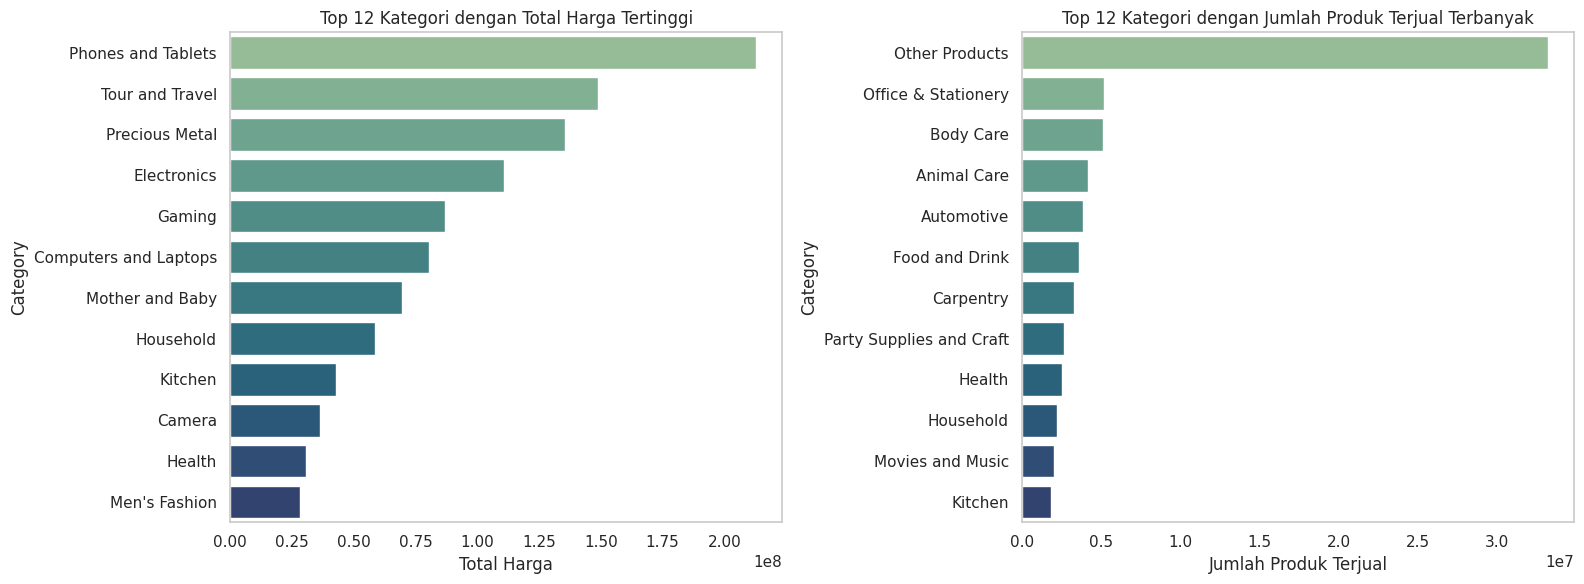

In [29]:
# Menghitung 12 kategori dengan total harga tertinggi
top_price_categories = df.groupby('Category')['Price'].sum().nlargest(12)

# Menghitung 12 kategori dengan jumlah produk terjual terbanyak
top_sold_categories = df.groupby('Category')['Number Sold'].sum().nlargest(12)

# Membuat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Membuat subplot 1: Total harga tertinggi
sns.barplot(x = top_price_categories.values,
            y = top_price_categories.index,
            palette = 'crest',
            ax = axes[0])
axes[0].set_title("Top 12 Kategori dengan Total Harga Tertinggi")
axes[0].set_xlabel("Total Harga")
axes[0].set_ylabel("Category")
axes[0].grid(False)

# Membuat subplot 2: Jumlah produk terjual terbanyak
sns.barplot(x = top_sold_categories.values,
            y = top_sold_categories.index,
            palette = 'crest',
            ax = axes[1])
axes[1].set_title("Top 12 Kategori dengan Jumlah Produk Terjual Terbanyak")
axes[1].set_xlabel("Jumlah Produk Terjual")
axes[1].set_ylabel("Category")
axes[1].grid(False)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan grafik
plt.show()

Visualisasi dari kedua grafik di atas menunjukkan bahwa:

• Kategori "Phones and Tablets" merupakan penyumbang total nilai penjualan tertinggi, menunjukkan dominasi yang jelas dibandingkan kategori lainnya.

• Kategori seperti "Tour and Travel", "Precious Metal", dan "Electronics" juga berada di posisi atas, menunjukkan bahwa produk di kategori ini cenderung memiliki harga satuan tinggi atau margin besar.

• Meskipun kategori seperti "Kitchen", "Camera", dan "Health" termasuk dalam 12 besar, nilai total penjualannya jauh lebih rendah dibandingkan peringkat atas.
Artinya, produk-produk ini mungkin dijual dalam jumlah banyak tetapi dengan harga lebih murah.

• "Other Products" memiliki jumlah produk terjual yang jauh lebih besar dibandingkan kategori lainnya. Ini bisa jadi kategori yang terlalu umum atau mencakup banyak jenis produk.

• Kategori seperti "Office & Stationery", "Body Care", dan "Animal Care" menempati posisi selanjutnya, menunjukkan bahwa produk kebutuhan sehari-hari atau rutin banyak diminati.

• Menariknya, beberapa kategori seperti "Health", "Kitchen", dan "Household" muncul di kedua grafik, artinya mereka cukup laku sekaligus menghasilkan total penjualan yang signifikan, meskipun tidak dominan dalam salah satu aspek saja.

## Insight yang didapat:
Kategori yang mahal belum tentu paling laris, dan sebaliknya, kategori paling laris belum tentu menyumbang nilai penjualan terbesar. Misalnya, "Phones and Tablets" mungkin tidak dijual dalam jumlah besar, tetapi harga per unitnya tinggi, sehingga mengangkat total nilai penjualan. Sementara "Other Products" sangat laku, tetapi belum tentu menyumbang nilai penjualan besar jika mayoritas produknya berharga rendah.

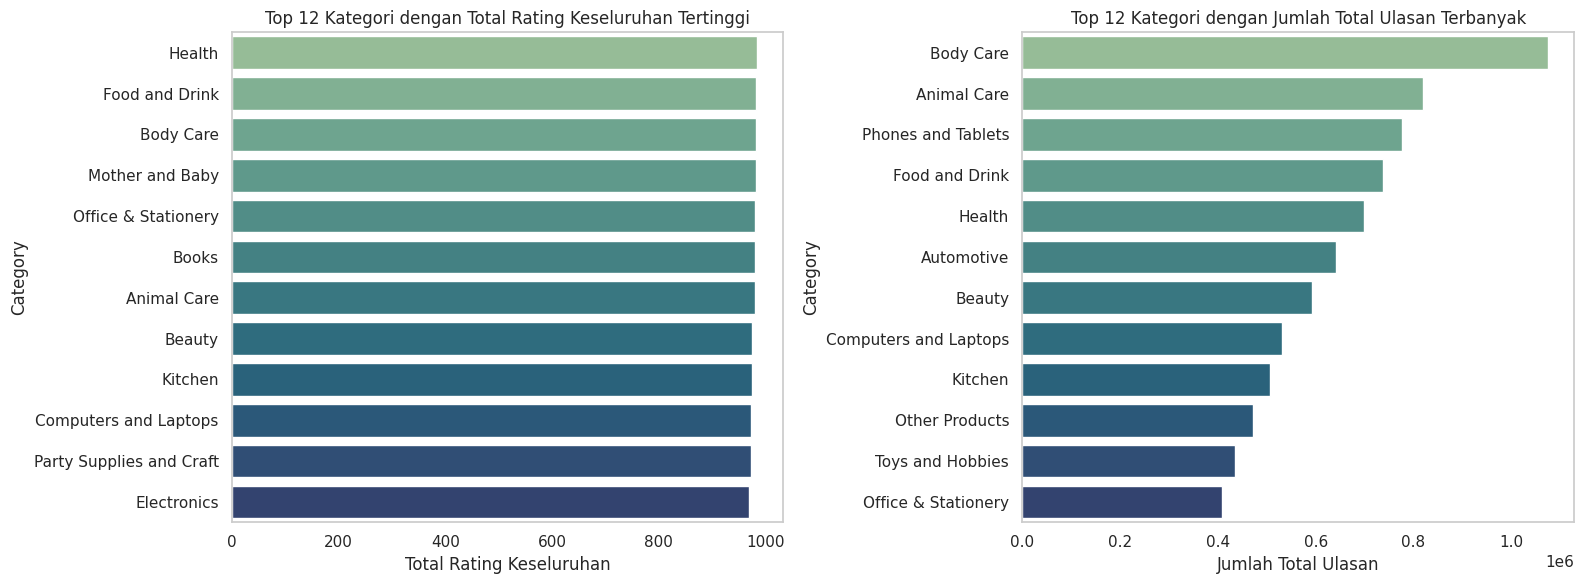

In [30]:
# Menghitung 12 kategori dengan total rating keseluruhan tertinggi
top_ovr_categories = df.groupby('Category')['Overall Rating'].sum().nlargest(12)

# Menghitung 12 kategori dengan jumlah total ulasan terbanyak
top_review_categories = df.groupby('Category')['Total Review'].sum().nlargest(12)

# Membuat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Membuat subplot 1: Total rating keseluruhan tertinggi
sns.barplot(x = top_ovr_categories.values,
            y = top_ovr_categories.index,
            palette = 'crest',
            ax = axes[0])
axes[0].set_title("Top 12 Kategori dengan Total Rating Keseluruhan Tertinggi")
axes[0].set_xlabel("Total Rating Keseluruhan")
axes[0].set_ylabel("Category")
axes[0].grid(False)

# Membuat subplot 2: Jumlah total ulasan terbanyak
sns.barplot(x = top_review_categories.values,
            y = top_review_categories.index,
            palette = 'crest',
            ax = axes[1])
axes[1].set_title("Top 12 Kategori dengan Jumlah Total Ulasan Terbanyak")
axes[1].set_xlabel("Jumlah Total Ulasan")
axes[1].set_ylabel("Category")
axes[1].grid(False)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan grafik
plt.show()

Visualisasi dari kedua grafik di atas menunjukkan bahwa:

• Kategori "Body Care" menempati peringkat teratas dalam hal jumlah total ulasan.

• Kategori "Health" memiliki total rating keseluruhan tertinggi di antara semua kategori.

• Kategori seperti "Food and Drink", "Animal Care", dan "Beauty" muncul di kedua grafik, menunjukkan bahwa kategori ini tidak hanya banyak diminati, tetapi juga mendapat penilaian yang cukup baik dari pelanggan.

• Kategori "Phones and Tablets" dan "Automotive" memiliki banyak ulasan tetapi tidak termasuk dalam kategori dengan rating tertinggi.

• Kategori "Books", "Mother and Baby", dan "Party Supplies and Craft" memiliki rating tinggi tetapi tidak terlalu banyak ulasan.

• Sebagian besar kategori dengan banyak ulasan juga memiliki total rating yang baik, namun tidak selalu masuk ke daftar teratas secara bersamaan.

## Insight yang didapat:
Kategori produk yang sukses secara bisnis bukan hanya yang populer dan banyak diulas, tetapi juga yang konsisten menghasilkan rating tinggi. Oleh karena itu, dalam pengambilan keputusan bisnis, seperti rekomendasi produk atau strategi promosi, penting untuk mempertimbangkan kombinasi antara jumlah ulasan dan tingkat kepuasan pelanggan (rating) secara bersamaan.

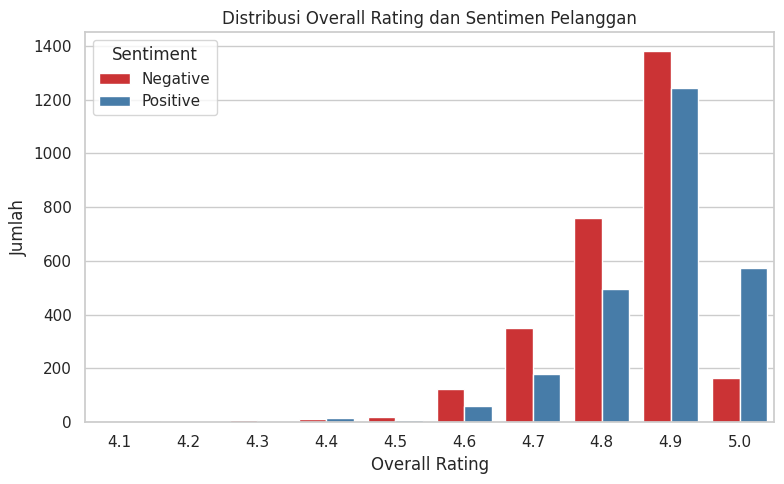

In [31]:
# Set ukuran gambar plot
plt.figure(figsize = (8, 5))

# Buat grafik batang berdasarkan kolom 'Overall Rating' dan 'Sentiment'
sns.countplot(data = df, x = 'Overall Rating', hue = 'Sentiment', palette = 'Set1')

# Menambahkan judul grafik
plt.title("Distribusi Overall Rating dan Sentimen Pelanggan")

# Menambahkan label sumbu
plt.xlabel("Overall Rating") # Label untuk sumbu X
plt.ylabel("Jumlah") # Label untuk sumbu Y

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi dari grafik di atas menunjukkan bahwa:

• Sebagian besar ulasan berada pada rating 4.8, 4.9, dan 5.0, menunjukkan bahwa mayoritas pelanggan memberikan penilaian sangat baik terhadap produk.

• Menariknya, pada rating 4.8 dan 4.9, jumlah ulasan berlabel negatif justru lebih banyak dibandingkan positif.

• Hal ini tampak tidak lazim karena umumnya rating tinggi diharapkan selaras dengan sentimen positif.

• Pada rating sempurna (5.0), sentimen positif kembali mendominasi, sesuai ekspektasi bahwa ulasan terbaik biasanya disertai perasaan puas.

## Insight yang didapat:
Adanya dominasi sentimen negatif pada rating tinggi mengindikasikan kemungkinan pelanggan memberikan rating tinggi secara default (misal karena promo, auto-rating, atau ketidaktelitian), meskipun isi ulasannya bernada negatif. Hal ini mengindikasikan adanya ketidaksesuaian antara nilai rating dan isi ulasan. Oleh karena itu, analisis sentimen menjadi sangat penting sebagai pelengkap evaluasi numerik. Dengan menelaah isi ulasan secara lebih dalam, pelaku bisnis dapat mengidentifikasi masalah tersembunyi yang tidak tercermin dari rating saja, sehingga pengambilan keputusan dapat lebih akurat dan berbasis pada persepsi pelanggan yang sebenarnya.

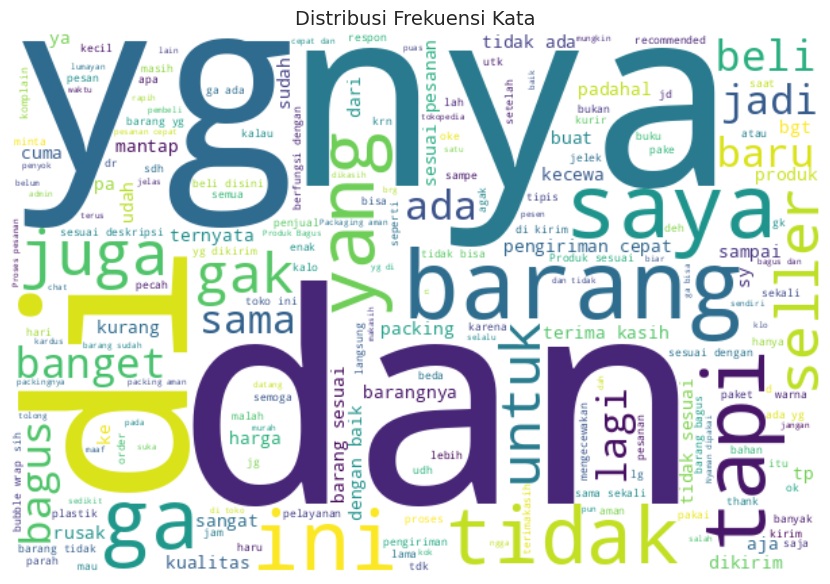

In [32]:
# Gabungkan seluruh ulasan pelanggan menjadi satu string
all_reviews = df['Customer Review'].astype(str).str.cat(sep = ' ')

# Inisialisasi objek WordCloud dengan pengaturan ukuran dan latar belakang
wordcloud = WordCloud(
    width = 600,
    height = 400,
    background_color = 'white'
)

# Buat wordcloud berdasarkan seluruh isi ulasan
wordcloud = wordcloud.generate(all_reviews)

# Buat canvas untuk menampilkan visualisasi WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off') # Hilangkan sumbu
plt.title("Distribusi Frekuensi Kata", fontsize = 14)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

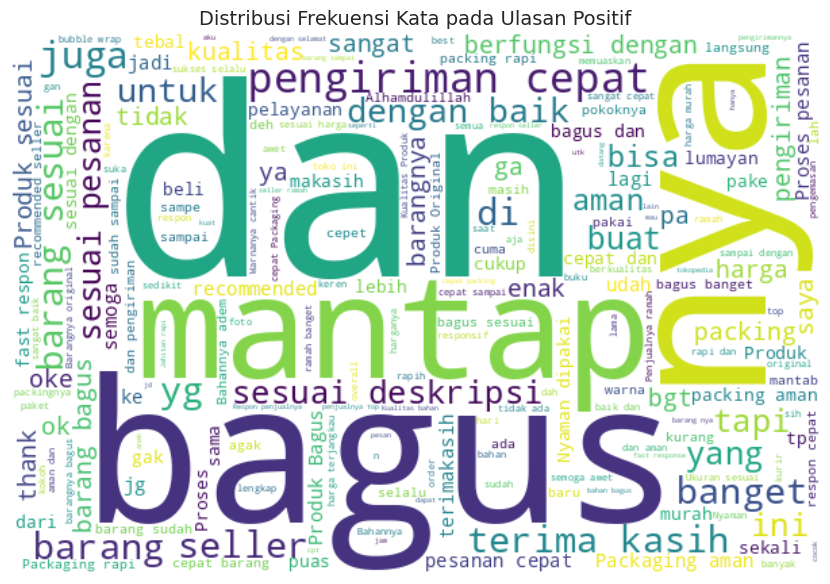

In [33]:
# Filter ulasan dengan sentimen positif
positive_reviews = df[df['Sentiment'] == 'Positive']['Customer Review']

# Gabungkan seluruh ulasan positif menjadi satu string
positive_text = positive_reviews.astype(str).str.cat(sep = ' ')

# Inisialisasi objek WordCloud dengan pengaturan ukuran dan latar belakang
wordcloud = WordCloud(
    width = 600,
    height = 400,
    background_color = 'white'
)

# Buat wordcloud dari ulasan positif
wordcloud = wordcloud.generate(positive_text)

# Buat canvas untuk menampilkan visualisasi WordCloud
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off') # Hilangkan sumbu
plt.title("Distribusi Frekuensi Kata pada Ulasan Positif", fontsize = 14)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

WordCloud hanya ditampilkan untuk ulasan dengan sentimen positif. Hal ini dilakukan karena WordCloud tidak mampu menangkap konteks negasi dalam kalimat, seperti "tidak bagus" atau "kurang memuaskan". Dalam kasus ini, kata "bagus" atau "memuaskan" bisa muncul sebagai kata dominan dalam ulasan negatif, padahal maknanya bertolak belakang. Untuk menghindari misinterpretasi terhadap makna sebenarnya dari ulasan negatif, visualisasi WordCloud untuk sentimen negatif tidak ditampilkan.

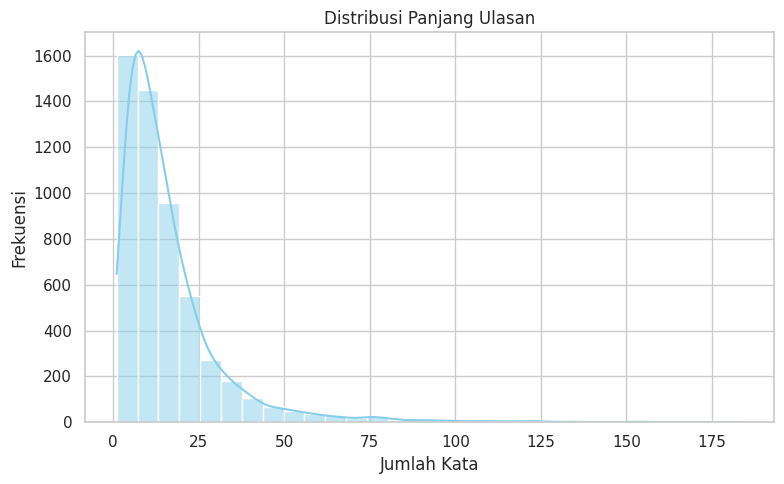

In [34]:
# Hitung jumlah kata pada setiap ulasan
review_lengths = df['Customer Review'].apply(lambda x: len(str(x).split()))

# Set ukuran gambar plot
plt.figure(figsize = (8, 5))

# Buat histogram untuk menampilkan distribusi panjang ulasan
sns.histplot(review_lengths, bins = 30, kde = True, color = 'skyblue')

# Tambahkan judul dan label sumbu
plt.title("Distribusi Panjang Ulasan")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

In [35]:
# Mencari jumlah kata minimum dan maksimum dari seluruh ulasan
min_words = review_lengths.min()
max_words = review_lengths.max()

# Tampilkan hasil
print(f"Jumlah kata terpendek: {min_words}")
print(f"Jumlah kata terpanjang: {max_words}")

Jumlah kata terpendek: 1
Jumlah kata terpanjang: 184


In [36]:
# Gabungkan hasil jumlah kata dengan kolom 'Customer Review'
preview = pd.DataFrame({
    'Customer Review': df['Customer Review'],
    'Word Count': review_lengths
})

# Tampilkan 5 ulasan pertama
print("5 ulasan pertama:")
print(preview.head())

# Tampilkan 5 ulasan terakhir
print("\n5 ulasan terakhir:")
print(preview.tail())

5 ulasan pertama:
                                     Customer Review  Word Count
0  Alhamdulillah berfungsi dengan baik. Packaging...          14
1  barang bagus dan respon cepat, harga bersaing ...          10
2  barang bagus, berfungsi dengan baik, seler ram...           9
3  bagus sesuai harapan penjual nya juga ramah. t...          10
4  Barang Bagus, pengemasan Aman, dapat Berfungsi...           8

5 ulasan terakhir:
                                        Customer Review  Word Count
5395  Harga bersaing, barang sesuai pesanan. Saya na...          77
5396  Beli ini krn Anak & Istri mau liburan di Jakar...          64
5397  pengemasan barang baik, kondisi barang jg utuh...          20
5398  Mungil tapi bekerja dng baik. Dan murahh terja...          11
5399  Produk sesuai deskripsi, packing aman terlindu...          18


## Label Preprocessing

In [37]:
# Mengubah kolom 'Customer Review' menjadi 'text' dan 'Sentiment' menjadi 'label' untuk mempermudah pemodelan
df.columns = ['text' if col == 'Customer Review' else
              'label' if col == 'Sentiment' else col
              for col in df.columns]

In [38]:
# Mengecek nama kolom yang baru, apakah berubah atau tidak
df.columns

Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'text', 'label',
       'Emotion'],
      dtype='object')

In [39]:
# Inisialisasi dan terapkan LabelEncoder untuk kolom 'label'
label_encoder = LabelEncoder() # Inisialisasi encoder untuk label
df['label'] = label_encoder.fit_transform(df['label'])

In [40]:
# Buat folder 'label_encoder'
os.makedirs('label_encoder', exist_ok = True)

# Simpan Label Encoder
joblib.dump(label_encoder, 'label_encoder/label_encoder.pkl')

# Menggabungkan folder 'label_encoder' ke dalam satu file zip
!zip -r label_encoder.zip label_encoder

  adding: label_encoder/ (stored 0%)
  adding: label_encoder/label_encoder.pkl (deflated 35%)


## Text Preprocessing (TF - IDF)

In [41]:
# Pemetaan emotikon teks ke emosi dalam bahasa Indonesia
emoticon_map = {
    # Emotikon senang
    ':-)': 'senang', ':)': 'senang', ':D': 'senang', 'XD': 'senang', '=D': 'senang',
    ':-]': 'senang', ':]': 'senang', '=)': 'senang', '(:': 'senang', '(-:': 'senang',
    '(^_^)': 'senang', '^_^': 'senang', '^o^': 'senang', '*_*': 'senang',
    '(^o^)': 'senang', ':3': 'senang',

    # Emotikon cinta
    '<3': 'cinta',

    # Emotikon sedih
    ':-(': 'sedih', ':(': 'sedih', ":'(": 'sedih', 'T_T': 'sedih', 'T.T': 'sedih',
    ':[(': 'sedih', ':[': 'sedih', ']:': 'sedih', '):': 'sedih', ')-:': 'sedih',
    'TT_TT': 'sedih', 'v_v': 'sedih',

    # Emotikon kaget/terkejut
    ':-o': 'kaget', ':o': 'kaget', ':-O': 'kaget', ':O': 'kaget',
    ':-0': 'kaget', '=O': 'kaget', 'O_O': 'kaget', 'o_o': 'kaget',

    # Emotikon main-main/bercanda
    ':-P': 'main-main', ':P': 'main-main', ':-p': 'main-main', ':p': 'main-main',
    ';-)': 'bercanda', ';)': 'bercanda', ':v': 'bercanda', ':}': 'bercanda',

    # Emotikon netral/bosan/muak
    ':-|': 'netral', ':|': 'netral', '-_-': 'muak', '-.-': 'muak', '=_=': 'muak',

    # Emotikon marah/frustrasi
    '>:(': 'marah', ':-@': 'marah', 'x(': 'marah', '>:O': 'marah', '>:[': 'marah',
    'D:<': 'marah', '>.<': 'marah', 'x_x': 'marah', 'xX': 'marah', 'Xx': 'marah'
}

# Tambahkan versi lowercase dari semua emotikon ke dalam map
emoticon_map.update({k.lower(): v for k, v in emoticon_map.items() if k.lower() != k})

In [42]:
# Fungsi untuk mengganti emotikon menjadi kata dan menghapus emoji dari teks
def convert_emoticon_and_remove_emoji(text_input):
    cleaned_text = text_input
    for symbol, meaning in emoticon_map.items():
        cleaned_text = cleaned_text.replace(symbol, meaning)
    cleaned_text = emoji.replace_emoji(cleaned_text, replace = " ")
    return cleaned_text

# Fungsi untuk memuat kamus kata gaul (chat words) dari file CSV
def read_chatword_dictionary(csv_file_path):
    try:
        slang_df = pd.read_csv(csv_file_path)
        if 'slang' in slang_df.columns and 'formal' in slang_df.columns:
            slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))
            return slang_dict
        else:
            raise ValueError("Kolom 'slang' dan 'formal' harus ada di dalam file CSV.")
    except Exception as e:
        print("Terjadi kesalahan saat membaca file chat words:", e)
        return {}

In [43]:
# Mengambil daftar stopwords dari NLTK
stopwords_idn = stopwords.words("indonesian") # Ambil stopwords bahasa Indonesia
stopwords_eng = stopwords.words("english") # Ambil stopwords bahasa Inggris

# Menggabungkan stopwords dari dua bahasa ke dalam satu set unik
stop_words = set(stopwords_idn + stopwords_eng)

In [44]:
# Mengambil URL kamus kata gaul dari GitHub
chat_words_url = 'https://raw.githubusercontent.com/reyhanksatria/prdect-id-sentiment-analysis/main/colloquial-indonesian-lexicon.csv'

# Membaca kamus kata gaul ke dalam dictionary
chat_words_dict = read_chatword_dictionary(chat_words_url)

In [45]:
# Membaca ulang file CSV ke dalam dataframe agar bisa ditampilkan
slang_df = pd.read_csv(chat_words_url)

# Menampilkan 5 baris pertama dari file
print(slang_df.head())

     slang    formal  In-dictionary  \
0     woww       wow              1   
1    aminn      amin              1   
2      met   selamat              1   
3   netaas   menetas              1   
4  keberpa  keberapa              0   

                                             context  category1 category2  \
0                                                wow   elongasi         0   
1  Selamat ulang tahun kakak tulus semoga panjang...   elongasi         0   
2  Met hari netaas kak!? Wish you all the best @t...  abreviasi         0   
3  Met hari netaas kak!? Wish you all the best @t...   afiksasi  elongasi   
4                           Birthday yg keberpa kak?  abreviasi         0   

  category3  
0         0  
1         0  
2         0  
3         0  
4         0  


In [46]:
# Menampilkan 5 pasangan kata gaul dan kata formal pertama dari dictionary
list(chat_words_dict.items())[:5]

[('woww', 'wow'),
 ('aminn', 'amin'),
 ('met', 'selamat'),
 ('netaas', 'menetas'),
 ('keberpa', 'keberapa')]

In [47]:
# Fungsi untuk membersihkan dan menormalkan teks sebelum dianalisis
def preprocess_text_clean(text_input):
    # Mengubah seluruh huruf dalam teks menjadi huruf kecil
    text_input = text_input.lower()

    # Menghapus tautan dari teks
    url_pattern = r'http\S+|www\S+|https\S+'
    text_input = re.sub(url_pattern, ' ', text_input, flags = re.MULTILINE)

    # Mengganti emotikon menjadi kata dan menghapus emoji dari teks
    text_input = convert_emoticon_and_remove_emoji(text_input)

    # Memisahkan teks menjadi kata-kata, lalu menghapus stopwords
    tokens = text_input.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Mengubah kata gaul menjadi bentuk formal menggunakan dictionary yang telah dibuat sebelumnya
    normalized_tokens = []
    for word in tokens:
        normalized_word = chat_words_dict.get(word, word) # Jika tidak ada padanannya, tetap gunakan kata aslinya
        normalized_tokens.append(normalized_word)

    # Menggabungkan kembali kata-kata yang sudah dibersihkan menjadi satu string
    cleaned_text = " ".join(normalized_tokens)

    return cleaned_text

In [48]:
# Membuat contoh sampel data ulasan dalam bentuk dataframe (uji coba dengan kalimat buatan sendiri)
sample_reviews = {
    'original_review': [
        "Wahh pengiriman cepet banget! produknya okee bgt :-)", # Ulasan positif dengan emotikon senang
        "B aja sih, ekspektasi aku terlalu tinggi ternyata :(", # Ulasan kecewa dengan emotikon sedih
        "https://tokosaya.com barangnya ngaco! GAK SESUAI DESKRIPSI D:<", # Ulasan negatif dengan tautan dan ekspresi marah
        "Wkwkwk Ngakak liat packaging-nya lucu XD", # Ulasan bercanda dengan emotikon tertawa
        "Produknya nyampe cepet sih, tapi kardusnya peyok :-p" # Ulasan campuran dengan emotikon bercanda
    ]
}

# Membuat dataframe dari data contoh ulasan
review_df = pd.DataFrame(sample_reviews)

# Fungsi untuk menerapkan preprocessing pada setiap baris teks
def run_text_cleaning(df_input, review_col):
    # Lakukan pembersihan teks dan simpan hasilnya di kolom baru
    cleaned_output = df_input.copy()
    cleaned_output['cleaned_review'] = cleaned_output[review_col].apply(preprocess_text_clean)
    return cleaned_output

# Menerapkan fungsi preprocessing pada kolom ulasan
result_df = run_text_cleaning(review_df, 'original_review')

# Menampilkan kolom teks sebelum dan sesudah dibersihkan
print(result_df[['original_review', 'cleaned_review']])

                                     original_review  \
0  Wahh pengiriman cepet banget! produknya okee b...   
1  B aja sih, ekspektasi aku terlalu tinggi terny...   
2  https://tokosaya.com barangnya ngaco! GAK SESU...   
3           Wkwkwk Ngakak liat packaging-nya lucu XD   
4  Produknya nyampe cepet sih, tapi kardusnya pey...   

                                      cleaned_review  
0  wah pengiriman cepat banget! produknya okee ba...  
1                       b saja sih, ekspektasi sedih  
2     barangnya ngaco! enggak sesuai deskripsi marah  
3    wkwkwk mengakak lihat packaging-nya lucu senang  
4  produknya sampai cepat sih, kardusnya peyok ma...  


In [49]:
# Simpan hasil preprocessing ke kolom 'text_clean'
df['text_clean'] = df['text'].apply(preprocess_text_clean)

In [50]:
# Bagi data menjadi 70% train, 15% validation, dan 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    df['text_clean'], df['label'],
    test_size = 0.15, # Pisahkan 15% data sebagai test set
    random_state = 42,
    stratify = df['label']
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size = 0.15 / (1 - 0.15), # Dari 85% sisanya, ambil 0.15 / (1 - 0.15) sebagai validation set
    random_state = 42,
    stratify = y_temp
)

## Baseline Model (Logistic Regression)

In [51]:
# Fungsi untuk melakukan ekstraksi fitur teks dengan TF-IDF
def tfidf_vectorize(train_data, val_data, test_data, max_fitur = 3000, ngram = (1, 2)):
    tfidf_model = TfidfVectorizer(max_features = max_fitur, ngram_range = ngram)
    fitur_train = tfidf_model.fit_transform(train_data)
    fitur_val = tfidf_model.transform(val_data)
    fitur_test = tfidf_model.transform(test_data)
    return fitur_train, fitur_val, fitur_test, tfidf_model

# Terapkan fungsi TF-IDF pada data train dan test
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_model = tfidf_vectorize(X_train, X_val, X_test)

In [52]:
# Fungsi untuk melatih model baseline (Logistic Regression)
def train_logreg(X, y):
    model = LogisticRegression(max_iter = 300, multi_class = 'ovr', random_state = 42)
    model.fit(X, y)
    return model

# Latih model baseline pada data train
baseline_model = train_logreg(X_train_tfidf, y_train)

In [53]:
# Fungsi untuk mengevaluasi performa model baseline pada data train
def evaluate_model_on_train(trained_model, X_train, y_train, label_names):
    # Lakukan prediksi terhadap data train
    y_train_predicted = trained_model.predict(X_train)

    # Cetak confusion matrix
    cm = confusion_matrix(y_train, y_train_predicted)
    print("Confusion Matrix (Train):\n", cm)

    # Cetak classification report
    report = classification_report(y_train, y_train_predicted, target_names = label_names)
    print("\nClassification Report (Train):\n", report)

# Memanggil fungsi evaluasi model menggunakan data train
evaluate_model_on_train(baseline_model, X_train_tfidf, y_train, label_encoder.classes_)

Confusion Matrix (Train):
 [[1899   76]
 [ 117 1688]]

Classification Report (Train):
               precision    recall  f1-score   support

    Negative       0.94      0.96      0.95      1975
    Positive       0.96      0.94      0.95      1805

    accuracy                           0.95      3780
   macro avg       0.95      0.95      0.95      3780
weighted avg       0.95      0.95      0.95      3780



In [54]:
# Fungsi untuk mengevaluasi performa model baseline pada data validasi
def evaluate_model_on_val(trained_model, X_val, y_val, label_names):
    # Lakukan prediksi terhadap data validasi
    y_val_predicted = trained_model.predict(X_val)

    # Cetak confusion matrix
    cm = confusion_matrix(y_val, y_val_predicted)
    print("Confusion Matrix (Validation):\n", cm)

    # Cetak classification report
    report = classification_report(y_val, y_val_predicted, target_names = label_names)
    print("\nClassification Report (Validation):\n", report)

# Memanggil fungsi evaluasi model menggunakan data validasi
evaluate_model_on_val(baseline_model, X_val_tfidf, y_val, label_encoder.classes_)

Confusion Matrix (Validation):
 [[383  40]
 [ 44 343]]

Classification Report (Validation):
               precision    recall  f1-score   support

    Negative       0.90      0.91      0.90       423
    Positive       0.90      0.89      0.89       387

    accuracy                           0.90       810
   macro avg       0.90      0.90      0.90       810
weighted avg       0.90      0.90      0.90       810



In [55]:
# Buat folder 'logreg_and_tfidf'
os.makedirs('logreg_and_tfidf', exist_ok = True)

# Simpan model baseline (Logistic Regression)
joblib.dump(baseline_model, 'logreg_and_tfidf/logreg_model.pkl')

# Simpan TF-IDF Vectorizer
joblib.dump(tfidf_model, 'logreg_and_tfidf/tfidf_vectorizer.pkl')

# Salin Label Encoder ke folder 'logreg_and_tfidf'
joblib.dump(label_encoder, 'logreg_and_tfidf/label_encoder.pkl')

# Menggabungkan folder 'logreg_and_tfidf' ke dalam satu file zip
!zip -r logreg_and_tfidf.zip logreg_and_tfidf

  adding: logreg_and_tfidf/ (stored 0%)
  adding: logreg_and_tfidf/logreg_model.pkl (deflated 6%)
  adding: logreg_and_tfidf/tfidf_vectorizer.pkl (deflated 75%)
  adding: logreg_and_tfidf/label_encoder.pkl (deflated 35%)


In [56]:
# Fungsi untuk mengevaluasi performa model baseline pada data test
def evaluate_model_on_test(trained_model, X_test, y_test, label_names):
    # Lakukan prediksi terhadap data test
    y_test_predicted = trained_model.predict(X_test)

    # Cetak confusion matrix
    cm = confusion_matrix(y_test, y_test_predicted)
    print("Confusion Matrix (Test):\n", cm)

    # Cetak classification report
    report = classification_report(y_test, y_test_predicted, target_names = label_names)
    print("\nClassification Report (Test):\n", report)

# Memanggil fungsi evaluasi model menggunakan data test
evaluate_model_on_test(baseline_model, X_test_tfidf, y_test, label_encoder.classes_)

Confusion Matrix (Test):
 [[391  32]
 [ 46 341]]

Classification Report (Test):
               precision    recall  f1-score   support

    Negative       0.89      0.92      0.91       423
    Positive       0.91      0.88      0.90       387

    accuracy                           0.90       810
   macro avg       0.90      0.90      0.90       810
weighted avg       0.90      0.90      0.90       810



## Text Preprocessing (IndoBERTweet)

In [57]:
# Fungsi preprocessing khusus untuk IndoBERTweet
def preprocess_for_indobertweet(raw_text):
    # Hapus URL
    raw_text = re.sub(r'http\S+|www.\S+', '', raw_text)

    # Hapus mention '@'
    raw_text = re.sub(r'@\w+', '', raw_text)

    # Hapus simbol '#' tetapi tetap pertahankan katanya
    raw_text = re.sub(r'#', '', raw_text)

    # Hapus spasi berlebih
    raw_text = re.sub(r'\s+', ' ', raw_text).strip()

    return raw_text

# Simpan hasil preprocessing ke kolom 'text_bert'
df['text_bert'] = df['text'].apply(preprocess_for_indobertweet)

In [58]:
# Tokenisasi menggunakan tokenizer IndoBERTweet
tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")

# Tokenisasi seluruh teks
encoded_inputs = tokenizer(
    df['text_bert'].tolist(),
    padding = True, # Menambahkan padding agar semua input memiliki panjang yang sama
    truncation = True, # Memotong token yang melebihi panjang maksimum model
    max_length = 256, # Panjang maksimum token
    return_tensors = "pt" # Mengembalikan output dalam format tensor PyTorch
)

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [59]:
# Ambil 'input_ids' dan 'attention_mask' dari hasil tokenisasi IndoBERTweet
input_ids = encoded_inputs['input_ids'] # Token ID hasil tokenisasi
attention_mask = encoded_inputs['attention_mask'] # Menandai posisi token bukan padding

# Ubah label (target klasifikasi) menjadi tensor PyTorch
labels = torch.tensor(df['label'].tolist())

# Bagi data menjadi 70% train, 15% validation, dan 15% test
input_ids_temp, input_ids_test, attn_temp, attn_test, y_temp, y_test_bert = train_test_split(
    input_ids, attention_mask, labels,
    test_size = 0.15, # Pisahkan 15% data sebagai test set
    random_state = 42,
    stratify = labels
)

input_ids_train, input_ids_val, attn_train, attn_val, y_train_bert, y_val_bert = train_test_split(
    input_ids_temp, attn_temp, y_temp,
    test_size = 0.15 / (1 - 0.15), # Dari 85% sisanya, ambil 0.15 / (1 - 0.15) sebagai validation set
    random_state = 42,
    stratify = y_temp
)

In [60]:
# Menyusun 'input_ids' dan 'attention_mask' ke dalam format dictionary
encoded_train = {
    'input_ids': input_ids_train, # 'input_ids' dari data train
    'attention_mask': attn_train # 'attention_mask' dari data train
}

encoded_val = {
    'input_ids': input_ids_val, # 'input_ids' dari data validasi
    'attention_mask': attn_val # 'attention_mask' dari data validasi
}

encoded_test = {
    'input_ids': input_ids_test, # 'input_ids' dari data test
    'attention_mask': attn_test # 'attention_mask' dari data test
}

## Model Building (IndoBERTweet)

In [61]:
# Membuat dataset custom untuk IndoBERTweet
class IndoBERTweetDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids # Token ID dari tokenizer
        self.attention_mask = attention_mask # Masking untuk token non-padding
        self.labels = labels # Label klasifikasi

    def __len__(self):
        return len(self.labels) # Jumlah data

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx], # Token ID per data
            'attention_mask': self.attention_mask[idx], # Mask per data
            'labels': self.labels[idx] # Label per data
        }

In [62]:
# Buat dataset untuk train, validation, dan test
train_dataset = IndoBERTweetDataset(input_ids_train, attn_train, y_train_bert) # Dataset train
val_dataset = IndoBERTweetDataset(input_ids_val, attn_val, y_val_bert) # Dataset validation
test_dataset = IndoBERTweetDataset(input_ids_test, attn_test, y_test_bert) # Dataset test

# Buat DataLoader untuk memuat data dalam batch
train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle = True) # DataLoader train (acak)
val_dataloader = DataLoader(val_dataset, batch_size = 16, shuffle = False) # DataLoader validation (berurutan)
test_dataloader = DataLoader(test_dataset, batch_size = 16, shuffle = False) # DataLoader test (berurutan)

In [63]:
# Load model IndoBERTweet
model = AutoModelForSequenceClassification.from_pretrained(
    "indolem/indobertweet-base-uncased",
    num_labels = 2, # Jumlah kelas
    hidden_dropout_prob = 0.25,
    attention_probs_dropout_prob = 0.25
)

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [64]:
# Deteksi device (gunakan GPU jika tersedia, jika tidak gunakan CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pindahkan model ke device yang terdeteksi
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31923, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.25, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.25, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=

In [65]:
# Definisikan input dummy untuk ringkasan model
dummy_input_ids = torch.zeros((1, 256), dtype = torch.long).to(device)
dummy_attention_mask = torch.ones((1, 256), dtype = torch.long).to(device)

# Tampilkan ringkasan model
summary(
    model,
    input_data = {
        "input_ids": dummy_input_ids,
        "attention_mask": dummy_attention_mask
    },
    depth = 3 # Tingkat kedalaman layer
)

Layer (type:depth-idx)                                       Output Shape              Param #
BertForSequenceClassification                                [1, 2]                    --
├─BertModel: 1-1                                             [1, 768]                  --
│    └─BertEmbeddings: 2-1                                   [1, 256, 768]             --
│    │    └─Embedding: 3-1                                   [1, 256, 768]             24,516,864
│    │    └─Embedding: 3-2                                   [1, 256, 768]             1,536
│    │    └─Embedding: 3-3                                   [1, 256, 768]             393,216
│    │    └─LayerNorm: 3-4                                   [1, 256, 768]             1,536
│    │    └─Dropout: 3-5                                     [1, 256, 768]             --
│    └─BertEncoder: 2-2                                      [1, 256, 768]             --
│    │    └─ModuleList: 3-6                                  --             

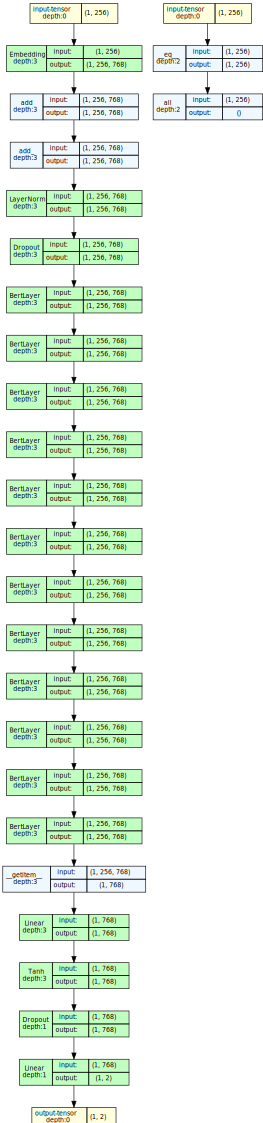

In [66]:
# Buat visualisasi arsitektur model
graph = draw_graph(
    model,
    input_data = {
        "input_ids": dummy_input_ids,
        "attention_mask": dummy_attention_mask
    },
    expand_nested = False,
    graph_name = "IndoBERTweet"
)

# Tampilkan visualisasi
graph.visual_graph

In [67]:
# Optimizer AdamW dengan learning rate dan weight decay
optimizer = AdamW(model.parameters(), lr = 0.00005, weight_decay = 0.01)

In [68]:
# Jumlah epoch pelatihan
epochs = 3

# Training loop untuk beberapa epoch
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    model.train() # Aktifkan mode training

    total_loss = 0 # Simpan akumulasi loss per epoch
    correct_train = 0 # Jumlah prediksi yang benar selama training
    total_train = 0 # Jumlah sampel selama training

    # Iterasi per batch dari train_dataloader
    for batch in tqdm(train_dataloader, desc = "Training"):
        # Pindahkan data batch ke device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass (hitung prediksi dan loss)
        outputs = model(input_ids = input_ids, attention_mask = attention_mask, labels = labels)
        loss = outputs.loss # Loss dari output
        logits = outputs.logits # Logit prediksi (belum softmax)

        # Backward pass dan optimisasi
        optimizer.zero_grad() # Reset gradien sebelumnya
        loss.backward() # Hitung gradien berdasarkan loss
        optimizer.step() # Update bobot model

        total_loss += loss.item() # Tambahkan loss batch ke total

        # Hitung jumlah prediksi benar dan total sampel
        preds = torch.argmax(logits, dim = 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    # Hitung rata-rata loss per epoch
    avg_loss = total_loss / len(train_dataloader)
    train_acc = correct_train / total_train

    # Tampilkan rata-rata loss per epoch
    tqdm.write(f"\nTrain Loss: {avg_loss:.4f}, Train Accuracy: {train_acc:.4f}")


Epoch 1/3


Training: 100%|██████████| 237/237 [02:25<00:00,  1.62it/s]



Train Loss: 0.1579, Train Accuracy: 0.9331

Epoch 2/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]



Train Loss: 0.0760, Train Accuracy: 0.9741

Epoch 3/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0466, Train Accuracy: 0.9831


Penurunan nilai loss yang signifikan dan konsisten menunjukkan bahwa proses pembelajaran model berjalan dengan baik. Namun, nilai train loss yang tergolong rendah hingga sangat rendah dapat menjadi indikasi terjadinya overfitting, terutama jika tidak disertai dengan evaluasi performa model pada data validasi atau data uji. Oleh karena itu, penting untuk membandingkan performa model pada data yang tidak digunakan selama proses pelatihan, yaitu data validasi atau data uji guna memastikan bahwa model memiliki kemampuan generalisasi yang baik, bukan sekadar mengingat pola pada data latih.

In [69]:
# Set model ke mode evaluasi
model.eval()

# Menyimpan hasil untuk evaluasi data train
y_true_train = [] # Menyimpan label asli dari data train
y_pred_train = [] # Menyimpan label prediksi dari model pada data train
y_probs_train = [] # Menyimpan probabilitas kelas positif untuk ROC-AUC train

# Nonaktifkan kalkulasi gradien saat evaluasi
with torch.no_grad():
    for batch in tqdm(train_dataloader, desc = "Evaluation on Train"):
        input_ids = batch['input_ids'].to(device) # Token ID ke device
        attention_mask = batch['attention_mask'].to(device) # Masking ke device
        labels = batch['labels'].to(device) # Label ke device

        # Forward pass
        outputs = model(input_ids = input_ids, attention_mask = attention_mask)
        logits = outputs.logits # Output mentah model (belum softmax)

        # Ubah ke probabilitas
        probs = F.softmax(logits, dim = 1)
        predictions = torch.argmax(probs, dim = 1) # Ambil prediksi kelas dengan skor tertinggi

        # Simpan label asli, prediksi, dan probabilitas
        y_true_train.extend(labels.cpu().numpy()) # Label asli
        y_pred_train.extend(predictions.cpu().numpy()) # Label prediksi
        y_probs_train.extend(probs[:, 1].cpu().numpy()) # Probabilitas kelas positif

# Tampilkan confusion matrix untuk data train
print("\nConfusion Matrix (Train):")
print(confusion_matrix(y_true_train, y_pred_train))

# Tampilkan classification report untuk data train
print("\nClassification Report (Train):")
print(classification_report(y_true_train, y_pred_train, digits = 2))

# Tampilkan ROC-AUC Score untuk data train
roc_auc = roc_auc_score(y_true_train, y_probs_train)
print(f"ROC-AUC Score (Train): {roc_auc:.4f}")

Evaluation on Train: 100%|██████████| 237/237 [00:49<00:00,  4.75it/s]


Confusion Matrix (Train):
[[1958   17]
 [   1 1804]]

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1975
           1       0.99      1.00      1.00      1805

    accuracy                           1.00      3780
   macro avg       1.00      1.00      1.00      3780
weighted avg       1.00      1.00      1.00      3780

ROC-AUC Score (Train): 1.0000


Performa yang hampir sempurna ini mengindikasikan bahwa model sangat mampu mengenali pola pada data pelatihan. Namun demikian, tingkat akurasi yang terlalu tinggi juga dapat menjadi indikasi overfitting, yaitu kondisi ketika model terlalu menyesuaikan diri terhadap data pelatihan dan kehilangan kemampuan generalisasi terhadap data yang belum pernah dilihat. Oleh karena itu, evaluasi lebih lanjut pada data validasi atau data uji sangat diperlukan untuk memastikan bahwa model tidak hanya menghafal data pelatihan, tetapi benar-benar mampu melakukan prediksi secara umum.

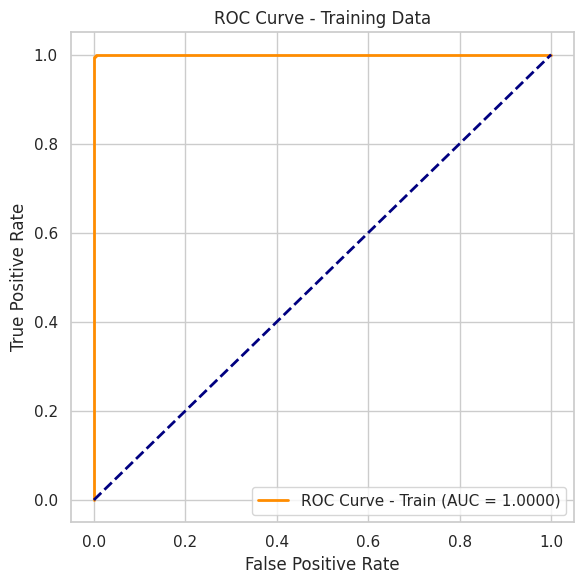

In [70]:
# Hitung FPR, TPR untuk kurva ROC train
fpr, tpr, _ = roc_curve(y_true_train, y_probs_train)

# Plot kurva ROC train
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC Curve - Train (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--') # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc = 'lower right')
plt.grid(True)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

In [71]:
def train_random_search_with_early_stopping(encoded_train, y_train_bert, encoded_val, y_val_bert, num_trials = 3, epochs = 3, patience = 2):
    # Set seed untuk memastikan hasil tetap konsisten
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.cuda.manual_seed_all(42)

    # Daftar nilai hyperparameter yang akan dicoba secara acak
    learning_rates = [0.00002, 0.000022, 0.000023, 0.000025]
    batch_sizes = [16, 32]
    optimizers = ['adamw']
    dropout_rates = [0.2, 0.22, 0.23, 0.25]
    weight_decays = [0.006, 0.007, 0.008, 0.01]

    best_val_acc = 0 # Akurasi validasi terbaik secara keseluruhan
    best_config = None # Konfigurasi terbaik
    best_model_state = None # Parameter model terbaik

    # Mulai iterasi untuk mencoba kombinasi hyperparameter secara acak
    for trial in range(num_trials):
        print(f"\nTrial {trial + 1}")

        # Pilih kombinasi hyperparameter secara acak dari daftar yang tersedia
        lr = random.choice(learning_rates)
        batch_size = random.choice(batch_sizes)
        optimizer_choice = random.choice(optimizers)
        dropout = random.choice(dropout_rates)
        wd = random.choice(weight_decays)

        print(f"Learning rate: {lr}, Batch size: {batch_size}, Optimizer: {optimizer_choice}, Dropout: {dropout}, Weight decay: {wd}")

        # Buat ulang dataset khusus untuk train dan validation
        train_dataset = IndoBERTweetDataset(encoded_train['input_ids'], encoded_train['attention_mask'], y_train_bert)
        val_dataset = IndoBERTweetDataset(encoded_val['input_ids'], encoded_val['attention_mask'], y_val_bert)

        # Buat ulang DataLoader untuk train dan validation
        train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True) # DataLoader train (acak)
        val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False) # DataLoader validation (berurutan)

        # Konfigurasi model dengan dropout khusus
        config = AutoConfig.from_pretrained(
            "indolem/indobertweet-base-uncased",
            num_labels = 2, # Jumlah kelas
            hidden_dropout_prob = dropout,
            attention_probs_dropout_prob = dropout
        )

        # Inisialisasi ulang model dari awal setiap trial menggunakan konfigurasi custom
        model = AutoModelForSequenceClassification.from_pretrained(
            "indolem/indobertweet-base-uncased",
            config = config
        ).to(device)

        # Inisialisasi optimizer AdamW
        optimizer = torch.optim.AdamW(model.parameters(), lr = lr, weight_decay = wd)

        # Hitung total langkah training
        num_training_steps = len(train_dataloader) * epochs

        # Scheduler untuk menurunkan learning rate secara bertahap
        scheduler = get_scheduler(
            name = "linear",
            optimizer = optimizer,
            num_warmup_steps = int(0.1 * num_training_steps),
            num_training_steps = num_training_steps
        )

        # Inisialisasi variabel untuk early stopping dan menyimpan metrik tiap epoch
        best_trial_model_state = None
        best_trial_val_acc = 0
        early_stop_counter = 0
        train_losses, val_losses = [], []
        train_accuracies, val_accuracies = [] , []

        # Mulai training per epoch
        for epoch in range(epochs):
            print(f"\nEpoch {epoch + 1}/{epochs}")
            model.train()
            total_loss = 0
            correct_train = 0
            total_train = 0

            # Proses training per batch
            for batch in tqdm(train_dataloader, desc = "Training"):
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                # Forward pass
                outputs = model(input_ids = input_ids, attention_mask = attention_mask, labels = labels)
                loss = outputs.loss
                logits = outputs.logits

                # Backpropagation dan update parameter
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                scheduler.step()

                # Hitung loss dan accuracy batch
                total_loss += loss.item()
                preds = torch.argmax(logits, dim = 1)
                correct_train += (preds == labels).sum().item()
                total_train += labels.size(0)

            # Hitung dan simpan metrik training pada akhir epoch
            avg_train_loss = total_loss / len(train_dataloader)
            train_acc = correct_train / total_train
            train_losses.append(avg_train_loss)
            train_accuracies.append(train_acc)

            tqdm.write(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_acc:.4f}")

            # Inisialisasi variabel untuk menghitung loss dan akurasi pada data validasi
            model.eval()
            total_val_loss = 0
            correct_val = 0
            total_val = 0

            # Proses validasi tanpa gradient tracking
            with torch.no_grad():
                for batch in val_dataloader:
                    input_ids = batch['input_ids'].to(device)
                    attention_mask = batch['attention_mask'].to(device)
                    labels = batch['labels'].to(device)

                    outputs = model(input_ids = input_ids, attention_mask = attention_mask, labels = labels)
                    loss = outputs.loss
                    logits = outputs.logits

                    total_val_loss += loss.item()
                    preds = torch.argmax(logits, dim = 1)
                    correct_val += (preds == labels).sum().item()
                    total_val += labels.size(0)

            # Hitung dan simpan metrik validasi pada akhir epoch
            avg_val_loss = total_val_loss / len(val_dataloader)
            val_acc = correct_val / total_val
            val_losses.append(avg_val_loss)
            val_accuracies.append(val_acc)

            tqdm.write(f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

            # Cek apakah akurasi validasi meningkat, jika tidak aktifkan early stopping
            if val_acc > best_trial_val_acc:
                best_trial_val_acc = val_acc
                best_trial_model_state = model.state_dict()
                best_epoch_number = epoch + 1
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                tqdm.write(f"Tidak ada peningkatan akurasi. Early stop counter: {early_stop_counter}/{patience}")
                if early_stop_counter >= patience:
                    tqdm.write("Training dihentikan lebih awal.")
                    break

        # Simpan model terbaik jika performanya lebih baik dari trial sebelumnya
        if best_trial_val_acc > best_val_acc:
            best_val_acc = best_trial_val_acc
            best_config = {
                "learning_rate": lr,
                "batch_size": batch_size,
                "optimizer": optimizer_choice,
                "dropout": dropout,
                "weight_decay": wd,
                "train_losses": train_losses,
                "val_losses": val_losses,
                "train_accuracies": train_accuracies,
                "val_accuracies": val_accuracies,
                "best_val_accuracy": best_trial_val_acc,
                "best_epoch": best_epoch_number
            }
            best_model_state = best_trial_model_state

    # Tampilkan hasil akhir terbaik dari seluruh trial
    print("\nAkurasi validasi terbaik:", best_val_acc)
    print("Konfigurasi hyperparameter terbaik:", best_config)

    # Muat ulang konfigurasi model terbaik
    final_config = AutoConfig.from_pretrained(
        "indolem/indobertweet-base-uncased",
        num_labels = 2, # Jumlah kelas
        hidden_dropout_prob = best_config["dropout"],
        attention_probs_dropout_prob = best_config["dropout"]
    )

    # Muat ulang model terbaik ke dalam memori
    final_model = AutoModelForSequenceClassification.from_pretrained(
        "indolem/indobertweet-base-uncased",
        config = final_config
    ).to(device)
    final_model.load_state_dict(best_model_state)

    return final_model, best_config

In [72]:
# Panggil fungsi dan simpan hasilnya
final_model, best_config = train_random_search_with_early_stopping(
    encoded_train, y_train_bert, encoded_val, y_val_bert, num_trials = 3, epochs = 3, patience = 2
)


Trial 1
Learning rate: 2e-05, Batch size: 16, Optimizer: adamw, Dropout: 0.22, Weight decay: 0.007


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3


Training: 100%|██████████| 237/237 [02:30<00:00,  1.58it/s]


Train Loss: 0.2751, Train Accuracy: 0.8701
Val Loss: 0.0956, Val Accuracy: 0.9679

Epoch 2/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0704, Train Accuracy: 0.9765
Val Loss: 0.0929, Val Accuracy: 0.9728

Epoch 3/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0483, Train Accuracy: 0.9844
Val Loss: 0.0812, Val Accuracy: 0.9778

Trial 2
Learning rate: 2.2e-05, Batch size: 16, Optimizer: adamw, Dropout: 0.25, Weight decay: 0.006


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.2914, Train Accuracy: 0.8632
Val Loss: 0.0884, Val Accuracy: 0.9704

Epoch 2/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0834, Train Accuracy: 0.9722
Val Loss: 0.0833, Val Accuracy: 0.9728

Epoch 3/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0580, Train Accuracy: 0.9791
Val Loss: 0.0806, Val Accuracy: 0.9765

Trial 3
Learning rate: 2e-05, Batch size: 16, Optimizer: adamw, Dropout: 0.22, Weight decay: 0.006


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Epoch 1/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.2814, Train Accuracy: 0.8704
Val Loss: 0.1012, Val Accuracy: 0.9667

Epoch 2/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0676, Train Accuracy: 0.9767
Val Loss: 0.0734, Val Accuracy: 0.9728

Epoch 3/3


Training: 100%|██████████| 237/237 [02:29<00:00,  1.59it/s]


Train Loss: 0.0482, Train Accuracy: 0.9825
Val Loss: 0.0746, Val Accuracy: 0.9778

Akurasi validasi terbaik: 0.9777777777777777
Konfigurasi hyperparameter terbaik: {'learning_rate': 2e-05, 'batch_size': 16, 'optimizer': 'adamw', 'dropout': 0.22, 'weight_decay': 0.007, 'train_losses': [0.27512664523934516, 0.07041908239352394, 0.048297964713343654], 'val_losses': [0.0955838556036207, 0.09289786774281632, 0.08119463376636964], 'train_accuracies': [0.8701058201058202, 0.9764550264550265, 0.9843915343915344], 'val_accuracies': [0.9679012345679012, 0.9728395061728395, 0.9777777777777777], 'best_val_accuracy': 0.9777777777777777, 'best_epoch': 3}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


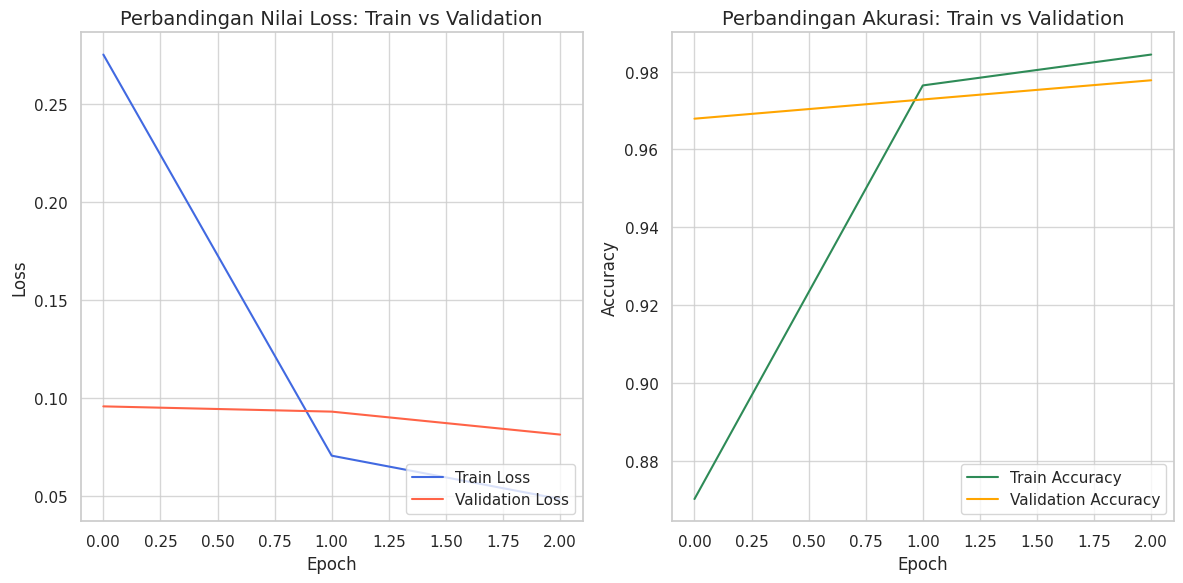

In [73]:
# Set ukuran gambar plot
plt.figure(figsize = (12, 6))

# Subplot grafik nilai loss
plt.subplot(1, 2, 1)
plt.plot(best_config['train_losses'], label = 'Train Loss', color = 'royalblue')
plt.plot(best_config['val_losses'], label = 'Validation Loss', color = 'tomato')
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.title('Perbandingan Nilai Loss: Train vs Validation', fontsize = 14)
plt.grid(True, alpha = 0.8)
plt.legend(loc = 'lower right')

# Subplot grafik akurasi
plt.subplot(1, 2, 2)
plt.plot(best_config['train_accuracies'], label = 'Train Accuracy', color = 'seagreen')
plt.plot(best_config['val_accuracies'], label = 'Validation Accuracy', color = 'orange')
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.title('Perbandingan Akurasi: Train vs Validation', fontsize = 14)
plt.grid(True, alpha = 0.8)
plt.legend(loc = 'lower right')

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

In [74]:
# Set model terbaik ke mode evaluasi
final_model.eval()

# Menyimpan hasil untuk evaluasi data validation
y_true_val = [] # Menyimpan label asli dari data validation
y_pred_val = [] # Menyimpan label prediksi dari model pada data validation
y_probs_val = [] # Menyimpan probabilitas kelas positif untuk ROC-AUC validation

# Nonaktifkan kalkulasi gradien saat evaluasi
with torch.no_grad():
    for batch in tqdm(val_dataloader, desc = "Evaluation on Validation"):
        input_ids = batch['input_ids'].to(device) # Token ID ke device
        attention_mask = batch['attention_mask'].to(device) # Masking ke device
        labels = batch['labels'].to(device) # Label ke device

        # Forward pass
        outputs = final_model(input_ids = input_ids, attention_mask = attention_mask)
        logits = outputs.logits # Output mentah model (belum softmax)

        # Ubah ke probabilitas
        probs = F.softmax(logits, dim = 1)
        predictions = torch.argmax(probs, dim = 1) # Ambil prediksi kelas dengan skor tertinggi

        # Simpan hasil ke list
        y_true_val.extend(labels.cpu().numpy()) # Label asli
        y_pred_val.extend(predictions.cpu().numpy()) # Label prediksi
        y_probs_val.extend(probs[:, 1].cpu().numpy()) # Probabilitas kelas positif

# Tampilkan confusion matrix untuk data validation
print("\nConfusion Matrix (Validation):")
print(confusion_matrix(y_true_val, y_pred_val))

# Tampilkan classification report untuk data validation
print("\nClassification Report (Validation):")
print(classification_report(y_true_val, y_pred_val, digits = 2))

# Tampilkan ROC-AUC Score untuk data validation
roc_auc_val = roc_auc_score(y_true_val, y_probs_val)
print(f"ROC-AUC Score (Validation): {roc_auc_val:.4f}")

Evaluation on Validation: 100%|██████████| 51/51 [00:10<00:00,  4.99it/s]


Confusion Matrix (Validation):
[[419   4]
 [ 14 373]]

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       423
           1       0.99      0.96      0.98       387

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810

ROC-AUC Score (Validation): 0.9963


Model belum menunjukkan indikasi overfitting yang signifikan.
Meskipun performa pada data pelatihan mencapai tingkat yang sangat tinggi, bahkan hampir sempurna, hal ini belum dapat dikategorikan sebagai overfitting karena performa pada data validasi tetap tinggi dan konsisten. Dengan demikian, model masih menunjukkan kemampuan generalisasi yang baik dan dapat dianggap andal. Namun demikian, evaluasi lebih lanjut pada data pengujian tetap diperlukan. Jika kinerja model menurun secara signifikan pada data uji, maka kemungkinan besar overfitting baru dapat dipastikan.

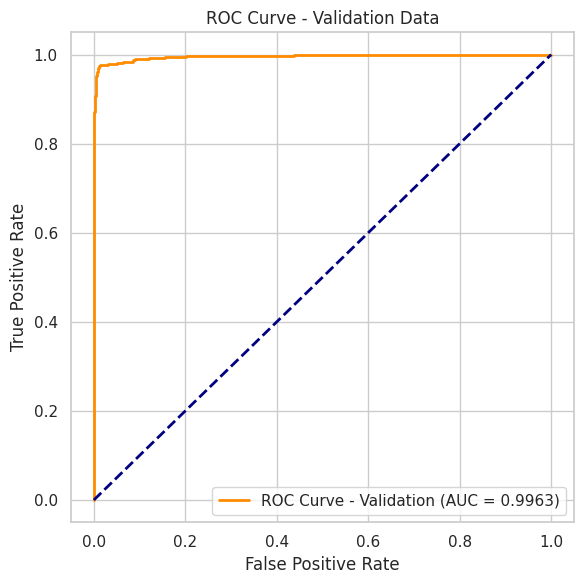

In [75]:
# Hitung FPR, TPR untuk kurva ROC validation
fpr_val, tpr_val, _ = roc_curve(y_true_val, y_probs_val)

# Plot kurva ROC validation
plt.figure(figsize = (6, 6))
plt.plot(fpr_val, tpr_val, color = 'darkorange', lw = 2, label = f'ROC Curve - Validation (AUC = {roc_auc_val:.4f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--') # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Data')
plt.legend(loc = 'lower right')
plt.grid(True)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()

In [76]:
# Simpan final model IndoBERTweet
final_model.save_pretrained('indobertweet_model_hf')

# Simpan Tokenizer
tokenizer.save_pretrained('tokenizer')

# Buat folder salinan untuk Label Encoder
os.makedirs('label_encoder_indobertweet', exist_ok = True)
joblib.dump(label_encoder, 'label_encoder_indobertweet/label_encoder.pkl')

# Menggabungkan folder model dan tokenizer ke dalam satu file zip
!zip -r model_and_tokenizer.zip indobertweet_model_hf tokenizer label_encoder_indobertweet

  adding: indobertweet_model_hf/ (stored 0%)
  adding: indobertweet_model_hf/model.safetensors (deflated 7%)
  adding: indobertweet_model_hf/config.json (deflated 50%)
  adding: tokenizer/ (stored 0%)
  adding: tokenizer/special_tokens_map.json (deflated 42%)
  adding: tokenizer/tokenizer.json (deflated 71%)
  adding: tokenizer/vocab.txt (deflated 52%)
  adding: tokenizer/tokenizer_config.json (deflated 74%)
  adding: label_encoder_indobertweet/ (stored 0%)
  adding: label_encoder_indobertweet/label_encoder.pkl (deflated 35%)


In [77]:
# Menggabungkan seluruh folder yang ada menjadi satu file
!zip final_weight_model.zip label_encoder.zip logreg_and_tfidf.zip model_and_tokenizer.zip

  adding: label_encoder.zip (stored 0%)
  adding: logreg_and_tfidf.zip (stored 0%)
  adding: model_and_tokenizer.zip (stored 0%)


In [78]:
# Set model terbaik ke mode evaluasi
final_model.eval()

# Menyimpan hasil untuk evaluasi data test
y_true_test = [] # Menyimpan label asli dari data test
y_pred_test = [] # Menyimpan label prediksi dari model pada data test
y_probs_test = [] # Menyimpan probabilitas kelas positif untuk ROC-AUC test

# Nonaktifkan kalkulasi gradien saat evaluasi
with torch.no_grad():
    for batch in tqdm(test_dataloader, desc = "Evaluation on Test"):
        input_ids = batch['input_ids'].to(device) # Token ID ke device
        attention_mask = batch['attention_mask'].to(device) # Masking ke device
        labels = batch['labels'].to(device) # Label ke device

        # Forward pass
        outputs = final_model(input_ids = input_ids, attention_mask = attention_mask)
        logits = outputs.logits # Output mentah model (belum softmax)

        # Ubah ke probabilitas
        probs = F.softmax(logits, dim = 1)
        predictions = torch.argmax(probs, dim = 1) # Ambil prediksi kelas dengan skor tertinggi

        # Simpan label asli, prediksi, dan probabilitas
        y_true_test.extend(labels.cpu().numpy()) # Label asli
        y_pred_test.extend(predictions.cpu().numpy()) # Label prediksi
        y_probs_test.extend(probs[:, 1].cpu().numpy()) # Probabilitas kelas positif

# Tampilkan confusion matrix untuk data test
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_true_test, y_pred_test))

# Tampilkan classification report untuk data test
print("\nClassification Report (Test):")
print(classification_report(y_true_test, y_pred_test, digits = 2))

# Tampilkan ROC-AUC Score untuk data test
roc_auc = roc_auc_score(y_true_test, y_probs_test)
print(f"ROC-AUC Score (Test): {roc_auc:.4f}")

Evaluation on Test: 100%|██████████| 51/51 [00:09<00:00,  5.21it/s]


Confusion Matrix (Test):
[[419   4]
 [  9 378]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       423
           1       0.99      0.98      0.98       387

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810

ROC-AUC Score (Test): 0.9986


Model ini menunjukkan kinerja yang sangat konsisten. Saat diuji dengan data yang benar-benar baru, model tetap mampu menghasilkan prediksi yang akurat dan seimbang untuk kedua kategori. Hasil ini sejalan dengan evaluasi sebelumnya pada data latih dan validasi, yang juga menunjukkan performa tinggi tanpa adanya tanda-tanda penurunan kualitas. Konsistensi ini mengindikasikan bahwa model tidak hanya menghafal data yang diberikan saat pelatihan, tetapi juga mampu mengenali pola yang relevan dan menerapkannya pada data yang belum pernah ditemui. Dengan demikian, model dapat dikatakan cukup andal dan layak digunakan untuk tugas serupa di masa depan.

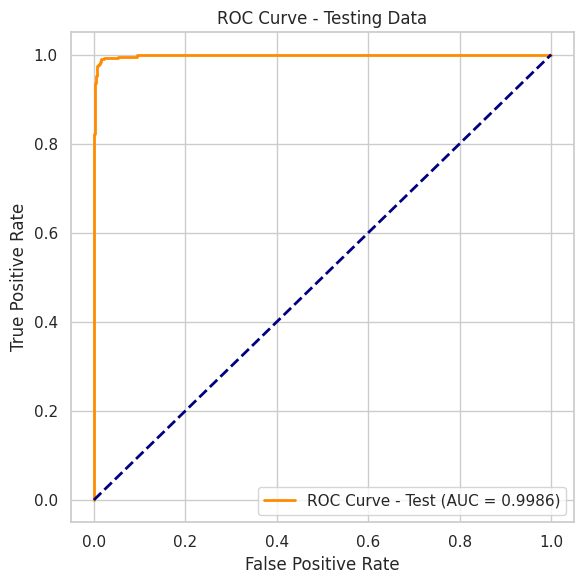

In [79]:
# Hitung FPR, TPR untuk kurva ROC test
fpr, tpr, _ = roc_curve(y_true_test, y_probs_test)

# Plot kurva ROC test
plt.figure(figsize = (6, 6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC Curve - Test (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--') # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Data')
plt.legend(loc = 'lower right')
plt.grid(True)

# Atur tata letak agar rapi
plt.tight_layout()

# Tampilkan plot
plt.show()